In [28]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input, Flatten
from keras.utils import to_categorical
%matplotlib inline

In [29]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [30]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


5


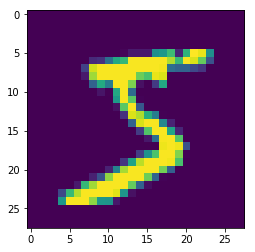

In [31]:
plt.imshow(x_train[0,:,:])
print(y_train[0])

In [32]:
x_train = x_train / 255.0
x_test = x_test / 255.0
x_flatten_train = np.reshape(x_train, (x_train.shape[0],-1))
x_flatten_test = np.reshape(x_test, (x_test.shape[0],-1))
y_onehot_train = to_categorical(y_train)
y_onehot_test = to_categorical(y_test)

In [33]:
Hidden_layer = Dense(1024, activation='relu')
Output_layer = Dense(10, activation='softmax')

In [34]:
inp = Input(shape=(784,))
hidden = Hidden_layer(inp)
out = Output_layer(hidden)

In [35]:
Hidden_layer.get_weights()

[array([[-0.05491909,  0.05729171,  0.00482517, ...,  0.02571495,
          0.01274436,  0.02463129],
        [ 0.02356066,  0.05716704, -0.04255383, ...,  0.01125581,
          0.05647685, -0.02525895],
        [-0.03054514,  0.04916329, -0.01627265, ..., -0.05124751,
          0.05490629,  0.03733332],
        ...,
        [-0.0420761 , -0.05225328, -0.04031524, ...,  0.02369759,
          0.01474632, -0.04656673],
        [-0.00044283, -0.02748584,  0.00086216, ..., -0.02145166,
          0.04001443, -0.00434762],
        [ 0.0118935 , -0.01110465,  0.02105384, ..., -0.05017403,
          0.05285782,  0.04896878]], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)]

In [36]:
Output_layer.get_weights()

[array([[-0.00158843,  0.04805356, -0.00114299, ..., -0.04360975,
          0.00606044, -0.06652337],
        [ 0.01319265,  0.07339384,  0.02483645, ..., -0.05652284,
          0.02483318, -0.00772056],
        [ 0.0683234 ,  0.03577494,  0.05974968, ...,  0.00794943,
          0.01778501,  0.0195121 ],
        ...,
        [-0.03857772,  0.00830811,  0.04114903, ..., -0.03654173,
          0.00602695,  0.06430587],
        [-0.05841508,  0.05717589,  0.00181042, ..., -0.04123312,
         -0.02424218,  0.01020093],
        [ 0.02413964,  0.03330514, -0.01251503, ..., -0.026205  ,
          0.00725836, -0.06545283]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)]

In [37]:
model = Model(inp, out)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_flatten_train, y_onehot_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 41s 687us/step - loss: 0.1894 - acc: 0.9447
Epoch 2/5
60000/60000 [==============================] - 39s 643us/step - loss: 0.0873 - acc: 0.9755
Epoch 3/5
60000/60000 [==============================] - 41s 678us/step - loss: 0.0639 - acc: 0.9824
Epoch 4/5
60000/60000 [==============================] - 37s 619us/step - loss: 0.0501 - acc: 0.9869
Epoch 5/5
60000/60000 [==============================] - 30s 496us/step - loss: 0.0398 - acc: 0.9898


In [38]:
Hidden_layer.get_weights()

[array([[-0.05491909,  0.05729171,  0.00482517, ...,  0.02571495,
          0.01274436,  0.02463129],
        [ 0.02356066,  0.05716704, -0.04255383, ...,  0.01125581,
          0.05647685, -0.02525895],
        [-0.03054514,  0.04916329, -0.01627265, ..., -0.05124751,
          0.05490629,  0.03733332],
        ...,
        [-0.0420761 , -0.05225328, -0.04031524, ...,  0.02369759,
          0.01474632, -0.04656673],
        [-0.00044283, -0.02748584,  0.00086216, ..., -0.02145166,
          0.04001443, -0.00434762],
        [ 0.0118935 , -0.01110465,  0.02105384, ..., -0.05017403,
          0.05285782,  0.04896878]], dtype=float32),
 array([-0.03024697, -0.17373888, -0.13272102, ..., -0.11096622,
        -0.04259139, -0.08289749], dtype=float32)]

In [39]:
Output_layer.get_weights()

[array([[-0.27127978, -0.10273429, -0.03606068, ..., -0.14429201,
         -0.20832045, -0.45121497],
        [-0.17846628,  0.03673957, -0.0022102 , ..., -0.5773953 ,
         -0.26943302, -0.3626179 ],
        [-0.00526261, -0.31165096, -0.038204  , ..., -0.20124331,
         -0.0889583 , -0.03056396],
        ...,
        [-0.53224874, -0.33062053, -0.03450553, ..., -0.55351204,
         -0.17803758,  0.02898102],
        [-0.3265797 , -0.01219444,  0.02121354, ..., -0.7117672 ,
         -0.08930605, -0.57812977],
        [-0.12432452, -0.00951731, -0.21391965, ..., -0.24280511,
          0.05495183, -0.5750007 ]], dtype=float32),
 array([-0.10111063, -0.13921309, -0.1187187 ,  0.00768479, -0.05500101,
        -0.02558596, -0.11934709, -0.06008592,  0.05399927, -0.02522991],
       dtype=float32)]

predict:  9
true label:  9


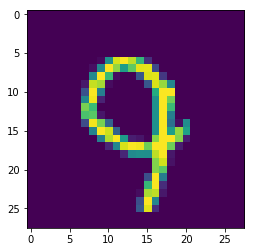

In [51]:
n = 999
plt.imshow(x_test[n,:,:])
print('predict: ', np.argmax(model.predict(x_flatten_test[n:n+1,:])))
print('true label: ', y_test[n])

In [53]:
infer_inp = Input(shape=(28,28))
infer_inp_flatten = Flatten()(infer_inp)
infer_hidden = Hidden_layer(infer_inp_flatten)
infer_out = Output_layer(infer_hidden)

In [54]:
infer_model = Model(infer_inp, infer_out)

In [57]:
infer_model.predict(x_test[n:n+1,:])

array([[3.5153008e-10, 3.5076263e-17, 4.9512644e-10, 2.9942999e-08,
        4.4233393e-06, 3.6002465e-08, 4.8606057e-13, 1.6034086e-03,
        1.4460280e-08, 9.9839205e-01]], dtype=float32)

In [58]:
model.predict(x_flatten_test[n:n+1,:])

array([[3.5153008e-10, 3.5076263e-17, 4.9512644e-10, 2.9942999e-08,
        4.4233393e-06, 3.6002465e-08, 4.8606057e-13, 1.6034086e-03,
        1.4460280e-08, 9.9839205e-01]], dtype=float32)